In [3]:
import numpy as np
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
ntrain = train.shape[0]
ntest = test.shape[0]
train.head()
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

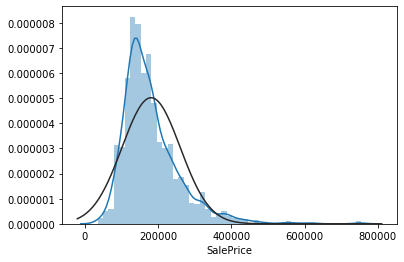

In [4]:
train['SalePrice'].describe()
import seaborn as sns
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)
#data appears to be right skewed 
train['SalePrice']=np.log1p(train['SalePrice'])


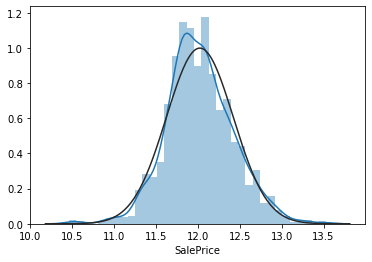

In [5]:
sns.distplot(train['SalePrice'],fit=norm)

In [6]:
train.shape[0]
test.shape[0]
y_train=train.SalePrice.values
#combining test and train data to perform preprocessing together:
comb=pd.concat((train,test))
comb.head(1460)
comb=comb.reset_index(drop=True)
comb.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [7]:
numerical=comb.select_dtypes(include=np.number)
numerical.head()
numerical.isnull().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
GarageYrBlt       159
MasVnrArea         23
BsmtFullBath        2
BsmtHalfBath        2
TotalBsmtSF         1
BsmtUnfSF           1
GarageArea          1
GarageCars          1
BsmtFinSF2          1
BsmtFinSF1          1
3SsnPorch           0
YearRemodAdd        0
MiscVal             0
OverallCond         0
YearBuilt           0
2ndFlrSF            0
OverallQual         0
LotArea             0
MoSold              0
MSSubClass          0
1stFlrSF            0
LowQualFinSF        0
EnclosedPorch       0
GrLivArea           0
PoolArea            0
YrSold              0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
ScreenPorch         0
WoodDeckSF          0
OpenPorchSF         0
Id                  0
dtype: int64

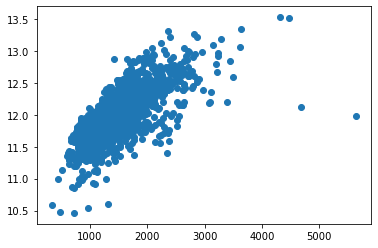

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x='GrLivArea',y='SalePrice',data=train)

In [8]:
categorical=comb.select_dtypes(include='object')
categorical
categorical.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition1          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
RoofStyle           0
Condition2          0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
CentralAir          0
SaleCondition       0
dtype: int64

In [9]:
comb['PoolQC']=comb['PoolQC'].fillna("none")
comb["MiscFeature"] =comb["MiscFeature"].fillna("none")
comb["Alley"] =comb["Alley"].fillna("none")
comb["Fence"] =comb["Fence"].fillna("none")
comb["FireplaceQu"] =comb["FireplaceQu"].fillna("none")

In [10]:
comb['LotFrontage']=comb['LotFrontage'].fillna(comb['LotFrontage'].mean)

In [11]:
comb['LotFrontage'].isnull().sum()

0

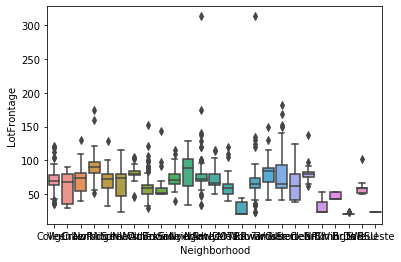

In [12]:
import seaborn as sns
sns.boxplot(x='Neighborhood', y='LotFrontage', data=train)

In [14]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    comb[col] = comb[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    comb[col] =comb[col].fillna(0)
#missing values in numerical basement variables indicate no basement so replaced by 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath'):
    comb[col] = comb[col].fillna(0)
#likewise for categorical replaced by none
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    comb[col] = comb[col].fillna('None')
comb["MasVnrType"] = comb["MasVnrType"].fillna("None")
comb["MasVnrArea"] = comb["MasVnrArea"].fillna(0)


In [16]:
comb['MSZoning'].value_counts()
#replacing null values with the most occuring 'RL'
comb['MSZoning']=comb['MSZoning'].fillna('RL')
comb = comb.drop(['Utilities'], axis=1)

KeyError: "['Utilities'] not found in axis"

In [17]:
comb["Functional"] = comb["Functional"].fillna("Typ")
comb['Electrical'].value_counts()
comb['Electrical']=comb['Electrical'].fillna('SBrkr')
comb['KitchenQual'].value_counts()
comb['KitchenQual']=comb['KitchenQual'].fillna('TA')

In [18]:
comb['Exterior1st']=comb['Exterior1st'].fillna('VinylSd')
comb['Exterior2nd'].value_counts()                                               
comb['Exterior2nd']=comb['Exterior2nd'].fillna('VinylSd')  
comb['SaleType'].isnull().sum()
comb['SaleType'].value_counts()
comb['SaleType']=comb['SaleType'].fillna('WD')

In [19]:
comb['MSSubClass'] =comb['MSSubClass'].fillna("None")



In [20]:
comb.isnull().sum().sort_values(ascending=False)

SalePrice        1459
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
                 ... 
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
Id                  0
Length: 80, dtype: int64

In [18]:
train['SalePrice'].isnull().sum()

0

In [21]:
# variables which are categorical
#MSSubClass is the type of dwelling
comb['MSSubClass'] = comb['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
comb['OverallCond'] =comb['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
comb['YrSold'] = comb['YrSold'].astype(str)
comb['MoSold'] = comb['MoSold'].astype(str)


In [22]:
cat=comb.select_dtypes(include='object').columns
cat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(comb[c].values)) 
    comb[c] = lbl.transform(list(comb[c].values))

# shape        
print('Shape all_data: {}'.format(comb.shape))



Shape all_data: (2919, 80)


In [21]:

comb.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [22]:
comb.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,10,RL,65,8450,1,2,3,Lvl,Inside,...,0,3,4,none,0,4,2,WD,Normal,12.247699
1,2,5,RL,80,9600,1,2,3,Lvl,FR2,...,0,3,4,none,0,7,1,WD,Normal,12.109016
2,3,10,RL,68,11250,1,2,0,Lvl,Inside,...,0,3,4,none,0,11,2,WD,Normal,12.317171
3,4,11,RL,60,9550,1,2,0,Lvl,Corner,...,0,3,4,none,0,4,0,WD,Abnorml,11.849405
4,5,10,RL,84,14260,1,2,0,Lvl,FR2,...,0,3,4,none,0,3,2,WD,Normal,12.429220


In [24]:
comb['Street'].head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64

In [24]:
#col=comb.select_dtypes(include='object').columns
#col
columns=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

for c in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(comb[c].values)) 
    comb[c] = lbl.transform(list(comb[c].values))

# shape        
print('Shape all_data: {}'.format(comb.shape))

Shape all_data: (2919, 80)


0

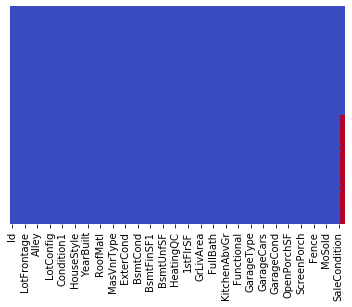

In [26]:
import seaborn as sns
sns.heatmap(comb.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
#comb.drop(['Id'],axis=1,inplace=True)
comb['SaleCondition'].isnull().sum()

In [27]:
X_trainn = comb[:ntrain]
X_test = comb[ntrain:]

In [28]:
X_trainn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,10,3,65,8450,1,2,3,3,4,...,0,3,4,none,0,4,2,8,4,12.247699
1,2,5,3,80,9600,1,2,3,3,2,...,0,3,4,none,0,7,1,8,4,12.109016
2,3,10,3,68,11250,1,2,0,3,4,...,0,3,4,none,0,11,2,8,4,12.317171
3,4,11,3,60,9550,1,2,0,3,0,...,0,3,4,none,0,4,0,8,0,11.849405
4,5,10,3,84,14260,1,2,0,3,2,...,0,3,4,none,0,3,2,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,10,3,62,7917,1,2,3,3,4,...,0,3,4,none,0,10,1,8,4,12.072547
1456,1457,5,3,85,13175,1,2,3,3,4,...,0,3,2,none,0,4,4,8,4,12.254868
1457,1458,11,3,66,9042,1,2,3,3,4,...,0,3,0,Shed,2500,7,4,8,4,12.493133
1458,1459,5,3,68,9717,1,2,3,3,4,...,0,3,4,none,0,6,4,8,4,11.864469


In [29]:
X_trainn.describe(include='object')

,LotFrontage,MiscFeature
count,1460,1460
unique,111,5
top,<bound method Series.mean of 0 65.0\n1 ...,none
freq,259,1406


In [58]:
X_trainn['LotFrontage'].tail(20)

1440                                                   79
1441    <bound method Series.mean of 0        65.0\n1 ...
1442                                                   85
1443    <bound method Series.mean of 0        65.0\n1 ...
1444                                                   63
1445                                                   70
1446    <bound method Series.mean of 0        65.0\n1 ...
1447                                                   80
1448                                                   70
1449                                                   21
1450                                                   60
1451                                                   78
1452                                                   35
1453                                                   90
1454                                                   62
1455                                                   62
1456                                                   85
1457          

In [31]:
neww=pd.read_csv('train.csv')
testnew=pd.read_csv('test.csv')
neww[neww['Id']==1442]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300


In [32]:
mean=neww['LotFrontage'].mean()
neww['LotFrontage'].fillna(mean,inplace=True)

In [33]:
val=neww['LotFrontage'].values

In [34]:
X_trainn.drop(columns=['LotFrontage'],inplace=True)

c:\users\waleed ahmed\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
X_trainn['LotFrontage']=val

c:\users\waleed ahmed\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
X_trainn.describe(include='object')

,MiscFeature
count,1460
unique,5
top,none
freq,1406


In [37]:
X_trainn['MiscFeature'].head()
lbl = LabelEncoder() 
X_trainn['MiscFeature']=lbl.fit_transform(X_trainn['MiscFeature'])

c:\users\waleed ahmed\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
X_trainn['MiscFeature'].describe()

count    1460.000000
mean        3.922603
std         0.404103
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: MiscFeature, dtype: float64

In [39]:
X_trainn.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
LotFrontage      0
Length: 80, dtype: int64

In [40]:
X_trainn=pd.get_dummies(X_trainn)


In [83]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [41]:
y_trainn=train['SalePrice'].values
y_trainn

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [42]:
X_trainn.drop(columns=['SalePrice'],inplace=True)

In [43]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#cv = KFold(n_splits=5, random_state=42, shuffle=True).get_n_splits(X_trainn.values)


In [44]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_trainn.values)
    rmse= np.sqrt(-cross_val_score(model, X_trainn.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [45]:
#scores = cross_val_score(lasso,X_trainn,Y_trainn, scoring='accuracy', cv=cv)
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(score)


Lasso score: 0.1504 (0.0269)

[0.12521258 0.15803031 0.14047601 0.12933387 0.19911383]
